In [98]:
import pandas as pd
import json
import glob
import os
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Lendo, previamente, apenas uma sample de um usuário

In [2]:
path_arquivos = 'sensors/'
teste_u1 = pd.json_normalize(json.load(open(path_arquivos+ '00qhiaz_1542975441749.json')))

In [3]:
teste_u1

,player_id,accelerometer,gyroscope,deviceMotion,magnetometer
0,00qhiaz,"[{'z': 0.5986328125, 'y': 0.822265625, 'x': 0....",[],[{'accelerationIncludingGravity': {'z': -5.451...,"[{'z': -41.75, 'y': -38.3125, 'x': -14.8125, '..."


O dataset possui: 
-ID
-accelerometer
-gyroscope
-magnetometer
-deviceMotion

In [4]:
df1_u1 = pd.DataFrame(teste_u1['accelerometer'][0])

In [5]:
df1_u1.head()

,z,y,x,screen
0,0.598633,0.822266,0.037109,RegisterScreen
1,0.576172,0.825195,0.039062,RegisterScreen
2,0.584961,0.826172,0.024414,RegisterScreen
3,0.592773,0.821289,0.030273,RegisterScreen
4,0.571289,0.816406,0.029297,RegisterScreen


In [6]:
df2_u1 = pd.DataFrame(teste_u1['gyroscope'][0])
df2_u1.head()

""


In [7]:
df3_u1 = pd.DataFrame(teste_u1['deviceMotion'][0])
df3_u1.head()
df3_u1.shape[0]

191

In [8]:
df4_u1 = pd.DataFrame(teste_u1['magnetometer'][0])
df4_u1.head()

,z,y,x,screen
0,-41.7500,-38.3125,-14.8125,RegisterScreen
1,-41.5625,-38.5625,-14.8750,RegisterScreen
2,-41.5000,-40.0000,-15.5625,RegisterScreen
3,-42.2500,-36.8750,-14.5000,RegisterScreen
4,-41.4375,-37.4375,-14.5000,RegisterScreen


In [9]:
#funções que serão utilizadas mais pra frente

#função para ler um arquivo
def read_file(nome_arquivo,metrica):
    teste_u10 = pd.json_normalize(json.load(open(path_arquivos + nome_arquivo)))
    df1_u10 = pd.DataFrame(teste_u10[str(metrica)][0])

    if(df1_u10.empty):
        return 0
    else:
        return df1_u10[['x','y','z']]

#função para ler a quantidade de gyroscopes num arquivo
def read_fileq(nome_arquivo,metrica):
    
    teste_u120 = pd.json_normalize(json.load(open(path_arquivos + nome_arquivo)))
    df1_u120 = pd.DataFrame(teste_u120[str(metrica)][0])

    if(df1_u120.empty):
        return 0
    else:
        return df1_u120.shape[0]
    
#função para coletar o quanto de gyroscopes eu quero pra cima 
def colect_stemps(quantidade,metrica):
    dic = {'user': [], 'quantity': []}
    df = pd.DataFrame(dic)

    for i in lista_arquivo:
        qtd = read_fileq(i,metrica)
        if (qtd >= quantidade):
            df.loc[len(df.index)] = [i,qtd]
    return df

## Analisando a quantidade de usuários e quantas vezes se repetem

In [10]:
lista = []
lista_arquivo = os.listdir('sensors/')
for file in lista_arquivo:
    lista.append(file.split("_")[0])
arquivos = pd.DataFrame(lista)

In [11]:
arquivos.value_counts()

9gykp6g    7904
flidyt     6595
uzip5ke    5229
frl4fzq    2870
d5deark    2218
           ... 
plfzjjx       1
d4ydsnq       1
d52s5qy       1
dici8pg       1
zyt437w       1
Length: 1132, dtype: int64

São 1132 usuários e tem alguns que não se repetem e outros que se repetem muito

In [12]:
h = pd.DataFrame(arquivos.value_counts())
h.columns = ['repeticao']

In [13]:
b = h
b = b.reset_index()
b.sort_index(inplace=True)
b_shuffled = b.sample(frac=1).reset_index(drop=True)

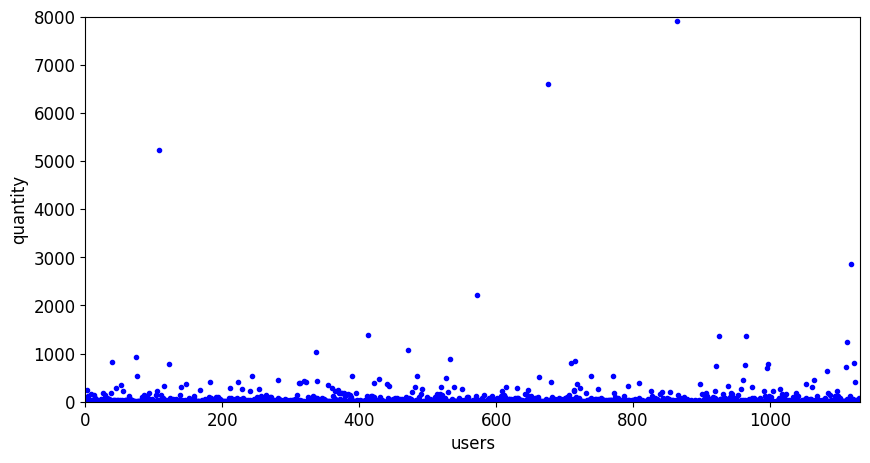

In [14]:
  plt.figure(figsize=(10,5))
  plt.plot(range(len(b_shuffled)),b_shuffled['repeticao'],'bo',ms=3)
  plt.xlim(0, 1132)
  plt.ylim(0, 8000)
  plt.xlabel("users",fontsize = 12)
  plt.ylabel("quantity",fontsize = 12)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.show()

## Analisando para timestemps = 1

In [15]:
timestemp1 = h[h['repeticao']<2]

In [16]:
#ajeitando o index
timestemp1.reset_index(inplace = True)
timestemp1.columns = ['user_id','repeticao']
lista_users_name = timestemp1['user_id'].tolist()
timestemp1 = pd.concat([timestemp1,pd.DataFrame(lista_users_name)], axis = 1)
timestemp1.columns = ['user_id','repeticao','id_timestemp']

In [17]:
#tamanho das samples dessas timestemps com tamanho 1
leitura_samples_id = []
for file in lista_arquivo:
    if(file.split("_")[0] in lista_users_name):
        nova_linha = timestemp1[timestemp1['user_id'] == file.split("_")[0]]
        nova_linha.iloc[0,2] = file.split("_")[1].split(".")[0]
        timestemp1[timestemp1['user_id'] == file.split("_")[0]] = nova_linha

In [18]:
#visualização
timestemp1.head(10)

,user_id,repeticao,id_timestemp
0,zcmg3s9,1,1543315653076
1,0dhpckv,1,1538916098382
2,1dip0jt,1,1540359594938
3,yv6n8gx,1,1543260874208
4,0f4uezb,1,1541637607517
5,0yx7i56,1,1549297833161
6,1tnew6a,1,1537303821892
7,b4dnqru,1,1540328375910
8,ylocu2a,1,1542982220706
9,2vv6lsy,1,1537280892505


In [19]:
timestemp1 = pd.concat([timestemp1,pd.DataFrame(lista_users_name),pd.DataFrame(lista_users_name)], axis = 1)

In [20]:
timestemp1.columns=['user_id','repeticao','id_timestemp','gyroscope_quantity','accelerometer_quantity']
timestemp1.index = timestemp1['user_id']
timestemp1.drop(columns=['user_id'],inplace=True)

In [21]:
for file in lista_arquivo:
    if(file.split("_")[0] in lista_users_name):
        timestemp1.loc[file.split("_")[0],'gyroscope_quantity'] = read_fileq(file,'gyroscope')
        timestemp1.loc[file.split("_")[0],'accelerometer_quantity'] = read_fileq(file,'accelerometer')

In [22]:
timestemp1.head(10)

,repeticao,id_timestemp,gyroscope_quantity,accelerometer_quantity
user_id,,,,
zcmg3s9,1,1543315653076,0,195
0dhpckv,1,1538916098382,598,199
1dip0jt,1,1540359594938,0,197
yv6n8gx,1,1543260874208,197,197
0f4uezb,1,1541637607517,600,5997
0yx7i56,1,1549297833161,0,68
1tnew6a,1,1537303821892,590,554
b4dnqru,1,1540328375910,183,183
ylocu2a,1,1542982220706,141,141


# Coletando timestemps com 590 gyroscopes pra cima

In [23]:
read_fileq('0dhpckv_1538916098382.json','gyroscope')

598

In [24]:
#df_590 = colect_stemps(590,'gyroscopes')
#df_590

In [25]:
#df_590.to_csv('gyroscope_590.csv', index=False)

In [26]:
df_590 = pd.read_csv('DataFramesInteressantes/gyroscope_590.csv')

In [27]:
df_590

,user,quantity
0,0dhpckv_1538916098382.json,598
1,0f4uezb_1541637607517.json,600
2,0hz8270_1537120509532.json,600
3,0hz8270_1537121171313.json,599
4,0hz8270_1537121294322.json,590
...,...,...
2427,zjod7wg_1543559738385.json,598
2428,zjod7wg_1543661032824.json,599
2429,zjod7wg_1544083021452.json,599
2430,zjod7wg_1544363972741.json,598


# Limpando um pouco para pegar users não repetidos

In [28]:
df_590 = df_590.assign(user_name=6)
for i in range(2432):
    df_590.loc[i,'user_name'] =  df_590.loc[i,'user'].split('_')[0]

In [29]:
df_590.drop_duplicates(subset='user_name', inplace=True)
df_590.index = range(195)

In [30]:
df_590

,user,quantity,user_name
0,0dhpckv_1538916098382.json,598,0dhpckv
1,0f4uezb_1541637607517.json,600,0f4uezb
2,0hz8270_1537120509532.json,600,0hz8270
3,0n1ewpo_1543531135711.json,598,0n1ewpo
4,0sl48ao_1543861104586.json,597,0sl48ao
...,...,...,...
190,yztl8at_1543391645159.json,598,yztl8at
191,z3u2vz_1536614184068.json,601,z3u2vz
192,z45npl8_1543410085929.json,600,z45npl8
193,z8c5rtb_1541198871651.json,602,z8c5rtb


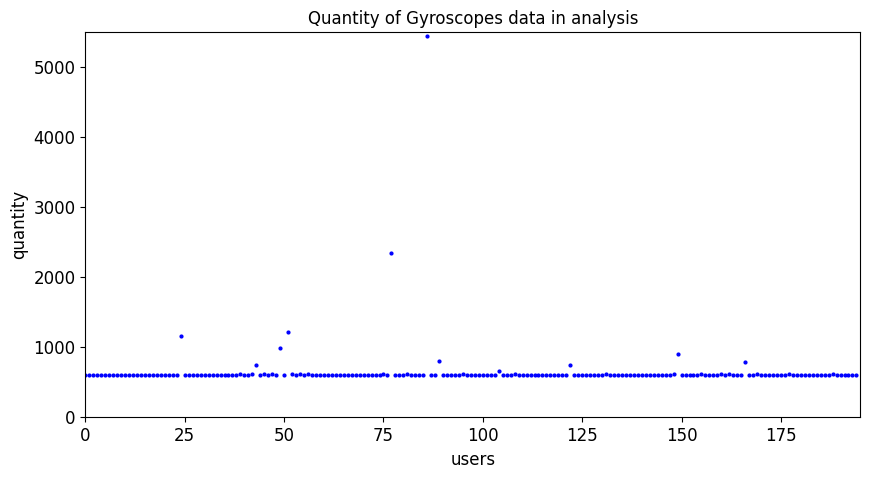

In [31]:
plt.figure(figsize=(10,5))
plt.plot(range(len(df_590)),df_590['quantity'],'bo',ms=2)
plt.xlim(0, 195)
plt.ylim(0, 5500)
plt.xlabel("users",fontsize = 12)
plt.ylabel("quantity",fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Quantity of Gyroscopes data in analysis")
plt.show()

## Testando gráficos para um usuário qualquer

In [32]:
df10 = read_file('ylocu2a_1542982220706.json','gyroscope')

<AxesSubplot: >

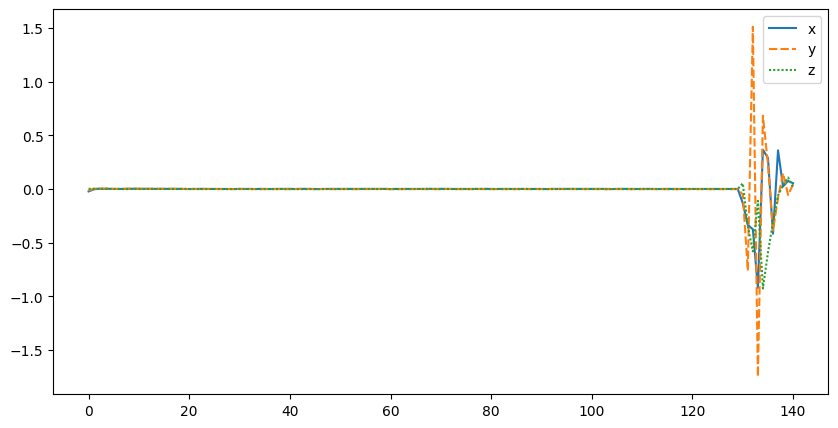

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df10)

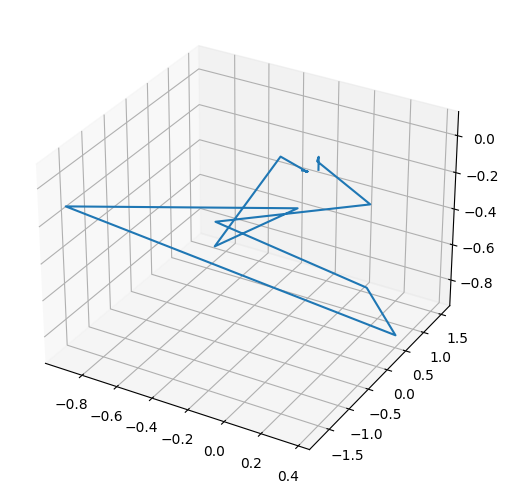

In [34]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.plot3D(df10['x'],df10['y'],df10['z'])
plt.tight_layout()
plt.show()

## Partindo para a organização do dataframe com 590 pra cima de gyroscopes

In [35]:
#para um arquivo
def formatar_dado(arquivo_nome,metrica,janela, limite):
    data_teste = read_file(arquivo_nome,metrica)
    
    my_dic = {'user': arquivo_nome.split('_')[0] ,'X':[],'Y':[],'Z':[]}
    dfd = pd.DataFrame(my_dic)
    
    i = 0
    j = int(janela)

    while j < limite:
        
        user = arquivo_nome.split('_')[0]
        
        xt = data_teste.iloc[i:j,0].values
        xt = np.array2string(xt, separator=',', max_line_width=0, formatter={'float_kind': lambda x: "%.10f" % x}).replace('[', '').replace(']', '').replace('\n', '').replace(' ', '')

        yt = data_teste.iloc[i:j,1].values
        yt = np.array2string(yt, separator=',', max_line_width=0, formatter={'float_kind': lambda x: "%.10f" % x}).replace('[', '').replace(']', '').replace('\n', '').replace(' ', '')

        zt = data_teste.iloc[i:j,2].values
        zt = np.array2string(zt, separator=',', max_line_width=0, formatter={'float_kind': lambda x: "%.10f" % x}).replace('[', '').replace(']', '').replace('\n', '').replace(' ', '')    
        
        dfd.loc[len(dfd.index)] = [user,xt,yt,zt]
        i=i+1
        j=j+1
    return dfd


In [36]:
#generalizando 
def formatar_dados(df_us,metrica,janela , limite):
    janela = int(janela)
    df_us.reset_index(drop=True,inplace=True)
    dfprincipal = formatar_dado(df_us[0],metrica,janela,limite)

    for u in range(1,len(df_us),1):
        df150 = formatar_dado(df_us[u],metrica,janela,limite)
        dfprincipal = pd.concat([dfprincipal,df150])
    dfprincipal.index = range(len(dfprincipal))
    return dfprincipal

In [135]:
def janela_decisao(t,lq,ld,partition):
    proporcao = 1/lq
    ldx = math.floor((t)/(partition*lq))

    if ldx > lq:
        ldx = lq

    return ldx
def particiona(train_dataframe , partition):    
    labels_quantity_proportion =  train_dataframe.label.value_counts()

    t = len(train_dataframe)

    ld = labels_quantity_proportion[0]

    lq = round(t/ld)
    
    df_group = pd.DataFrame(pd.DataFrame(train_dataframe.groupby('label')))

    lista_salvadora = []

    prop = janela_decisao(t,lq,ld,partition)

    janela_i = 0
    janela_j = prop


    for x in range(0 ,partition):
        df_concat = pd.DataFrame()
        
        for i in range(0, lq):
            
            df2_concat = df_group.iloc[i,1].iloc[janela_i:janela_j]
            df_concat = pd.concat([df_concat,df2_concat],axis = 0)
        
        lista_salvadora.append(df_concat)
        
        janela_i = janela_i + prop
        janela_j = janela_j + prop
        
        
    return lista_salvadora

In [38]:
#teste_gyroscope = formatar_dados(df_590['user'],'gyroscope',150,590)

In [39]:
#teste_gyroscope.rename(columns = {'user':'label'}, inplace=True)
#teste_gyroscope.to_csv('DataFramesInteressantes/resultado_590.csv', index=False)

In [136]:
train_dataframe = pd.read_csv('DataFramesInteressantes/resultado_590.csv')

In [137]:
train_dataframe 

,label,X,Y,Z
0,0dhpckv,"0.1339522091,0.1974345127,0.0579035137,0.10636...","0.1119696786,0.1665237345,0.0122220452,0.12100...","-0.0493760719,-0.0361872992,-0.0149299474,-0.0..."
1,0dhpckv,"0.1974345127,0.0579035137,0.1063655887,0.09692...","0.1665237345,0.0122220452,0.1210049852,0.03084...","-0.0361872992,-0.0149299474,-0.0102720786,-0.0..."
2,0dhpckv,"0.0579035137,0.1063655887,0.0969230847,0.13920...","0.0122220452,0.1210049852,0.0308492591,0.09234...","-0.0149299474,-0.0102720786,-0.0461983881,0.00..."
3,0dhpckv,"0.1063655887,0.0969230847,0.1392071586,0.06347...","0.1210049852,0.0308492591,0.0923429803,0.03047...","-0.0102720786,-0.0461983881,0.0072667014,-0.02..."
4,0dhpckv,"0.0969230847,0.1392071586,0.0634753793,-0.0885...","0.0308492591,0.0923429803,0.0304769492,-0.0886...","-0.0461983881,0.0072667014,-0.0296974419,-0.02..."
...,...,...,...,...
85795,zjod7wg,"-0.0085375618,0.0055758604,0.0072555161,-0.004...","-0.0085796398,-0.0298321979,-0.0405903034,-0.0...","0.0029776804,0.0032301481,-0.0203548065,-0.039..."
85796,zjod7wg,"0.0055758604,0.0072555161,-0.0043284357,-0.014...","-0.0298321979,-0.0405903034,-0.0172663386,-0.0...","0.0032301481,-0.0203548065,-0.0398331667,-0.00..."
85797,zjod7wg,"0.0072555161,-0.0043284357,-0.0145536427,-0.00...","-0.0405903034,-0.0172663386,-0.0257378540,-0.0...","-0.0203548065,-0.0398331667,-0.0079535306,-0.0..."
85798,zjod7wg,"-0.0043284357,-0.0145536427,-0.0040453417,0.00...","-0.0172663386,-0.0257378540,-0.0117874173,0.03...","-0.0398331667,-0.0079535306,-0.0055031561,-0.0..."


In [138]:
df_teste = particiona(train_dataframe,2)[0]

In [139]:
df_teste

,label,X,Y,Z
0,0dhpckv,"0.1339522091,0.1974345127,0.0579035137,0.10636...","0.1119696786,0.1665237345,0.0122220452,0.12100...","-0.0493760719,-0.0361872992,-0.0149299474,-0.0..."
1,0dhpckv,"0.1974345127,0.0579035137,0.1063655887,0.09692...","0.1665237345,0.0122220452,0.1210049852,0.03084...","-0.0361872992,-0.0149299474,-0.0102720786,-0.0..."
2,0dhpckv,"0.0579035137,0.1063655887,0.0969230847,0.13920...","0.0122220452,0.1210049852,0.0308492591,0.09234...","-0.0149299474,-0.0102720786,-0.0461983881,0.00..."
3,0dhpckv,"0.1063655887,0.0969230847,0.1392071586,0.06347...","0.1210049852,0.0308492591,0.0923429803,0.03047...","-0.0102720786,-0.0461983881,0.0072667014,-0.02..."
4,0dhpckv,"0.0969230847,0.1392071586,0.0634753793,-0.0885...","0.0308492591,0.0923429803,0.0304769492,-0.0886...","-0.0461983881,0.0072667014,-0.0296974419,-0.02..."
...,...,...,...,...
85550,zjod7wg,"0.0173108134,-0.0171390395,-0.0136425753,0.007...","-0.0448689380,-0.0107565076,-0.0075940038,-0.0...","-0.0383543134,0.0059793293,-0.0089314433,-0.01..."
85551,zjod7wg,"-0.0171390395,-0.0136425753,0.0070919980,0.007...","-0.0107565076,-0.0075940038,-0.0448204685,-0.0...","0.0059793293,-0.0089314433,-0.0107282781,-0.01..."
85552,zjod7wg,"-0.0136425753,0.0070919980,0.0072097097,-0.003...","-0.0075940038,-0.0448204685,-0.0405817813,-0.0...","-0.0089314433,-0.0107282781,-0.0182120271,-0.0..."
85553,zjod7wg,"0.0070919980,0.0072097097,-0.0038461372,0.0040...","-0.0448204685,-0.0405817813,-0.0363228541,-0.0...","-0.0107282781,-0.0182120271,-0.0034522557,-0.0..."
